
================= 🕒 Step 0 =================
👑 Leader 0 promotes with influence=1.00
🧍‍♀️ Consumer 20 | Leader 0 | Trust=0.85 | Sens=0.33 | Infl=1.00 | Prob=0.97 | Buy=True
🧍‍♀️ Consumer 22 | Leader 0 | Trust=0.54 | Sens=0.46 | Infl=1.00 | Prob=0.82 | Buy=True
🧍‍♀️ Consumer 17 | Leader 0 | Trust=0.69 | Sens=0.69 | Infl=1.00 | Prob=0.85 | Buy=False
🧍‍♀️ Consumer 7 | Leader 0 | Trust=0.82 | Sens=0.68 | Infl=1.00 | Prob=0.92 | Buy=True
🧍‍♀️ Consumer 21 | Leader 0 | Trust=0.61 | Sens=0.50 | Infl=1.00 | Prob=0.86 | Buy=True
🧍‍♀️ Consumer 10 | Leader 0 | Trust=0.90 | Sens=0.79 | Infl=1.00 | Prob=0.93 | Buy=True
🧍‍♀️ Consumer 1 | Leader 0 | Trust=0.64 | Sens=0.46 | Infl=1.00 | Prob=0.88 | Buy=True
🧍‍♀️ Consumer 26 | Leader 0 | Trust=0.63 | Sens=0.96 | Infl=1.00 | Prob=0.68 | Buy=False
🧍‍♀️ Consumer 23 | Leader 0 | Trust=0.55 | Sens=0.49 | Infl=1.00 | Prob=0.82 | Buy=False
🧍‍♀️ Consumer 24 | Leader 0 | Trust=0.82 | Sens=0.56 | Infl=1.00 | Prob=0.94 | Buy=True
🧍‍♀️ Consumer 12 | Leader 0 | Tru

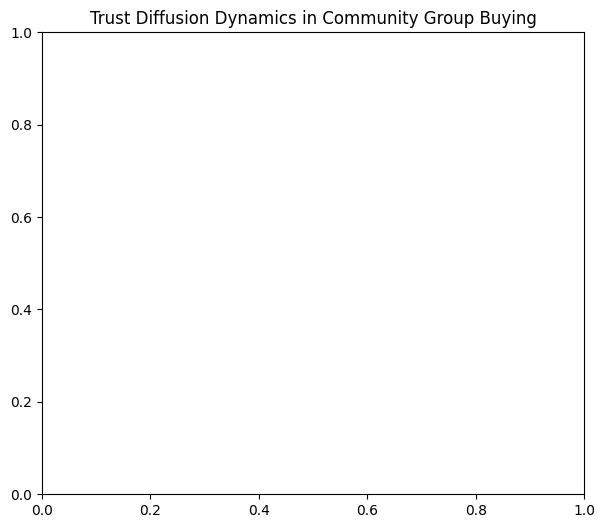

🎞️ Animation saved to: /Users/estherwang/Documents/GitHub/4403_project/data/trust_diffusion.gif


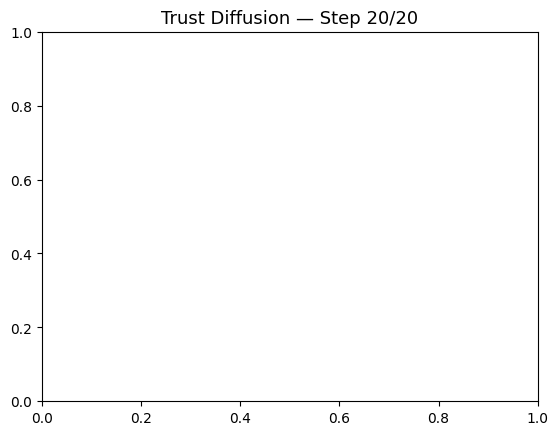

In [1]:
# =============================================
# 🎬 Trust Diffusion Animation (Community Group Buying ABM)
# =============================================

import sys, os, random, numpy as np, matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import Normalize

# 导入自定义模型
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from model import GroupBuyingModel

random.seed(42)
np.random.seed(42)

# ============================================================
# 🧠 自定义模型：带信任记录
# ============================================================

class VisualModel(GroupBuyingModel):
    def __init__(self, n_consumers=30, n_leaders=3):
        from agents import Consumer, Leader, Platform
        from scheduler import SocialScheduler

        self.n_consumers = n_consumers
        self.n_leaders = n_leaders

        self.consumers = [
            Consumer(i, random.uniform(0.5, 1.0), random.uniform(0.3, 1.0), list(range(n_consumers)))
            for i in range(n_consumers)
        ]
        self.leaders = [
            Leader(i, random.uniform(0.6, 1.0), random.sample(range(n_consumers), min(20, n_consumers)))
            for i in range(n_leaders)
        ]
        self.platform = Platform(base_price=5, subsidy=3)
        self.scheduler = SocialScheduler(self.consumers, self.leaders, self.platform)

        self.trust_snapshots = []  # 保存每步信任度快照

    def step(self):
        self.scheduler.step()
        # 每步后记录所有消费者的信任度
        trusts = [c.trust for c in self.consumers]
        self.trust_snapshots.append(trusts)

# ============================================================
# 🚀 运行模型（模拟信任传播）
# ============================================================

model = VisualModel(n_consumers=30, n_leaders=3)
steps = 20
for _ in range(steps):
    model.step()

print(f"✅ Simulation finished with {steps} steps.")

# ============================================================
# 🎨 构建网络图
# ============================================================

G = nx.erdos_renyi_graph(model.n_consumers, 0.2, seed=42)  # 简单随机网络
pos = nx.spring_layout(G, seed=42)  # 固定节点布局

leader_ids = [leader.id for leader in model.leaders]

# ============================================================
# 🎞️ 动画绘制函数
# ============================================================

fig, ax = plt.subplots(figsize=(7, 6))
plt.title("Trust Diffusion Dynamics in Community Group Buying")

norm = Normalize(vmin=0.3, vmax=1.0)  # 颜色映射范围更宽


def update(frame):
    ax.clear()
    plt.title(f"Trust Diffusion — Step {frame+1}/{steps}", fontsize=13)

    trusts = model.trust_snapshots[frame]
    colors = plt.cm.plasma(norm(trusts))

    # 绘制普通消费者节点
    nx.draw_networkx_nodes(G, pos, nodelist=[i for i in range(model.n_consumers) if i not in leader_ids],
                           node_color=[colors[i] for i in range(model.n_consumers) if i not in leader_ids],
                           node_size=150, ax=ax)

    # 绘制团长节点（红色边框）
    nx.draw_networkx_nodes(G, pos, nodelist=leader_ids,
                           node_color=[colors[i] for i in leader_ids],
                           node_shape='s', edgecolors='black', node_size=300, ax=ax)

    # 绘制边
    nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)
    ax.axis("off")

# ============================================================
# 🎥 生成动画
# ============================================================

ani = FuncAnimation(fig, update, frames=len(model.trust_snapshots), interval=600, repeat=False)

# 显示动画
plt.show()

# ============================================================
# 💾 保存为 GIF
# ============================================================

save_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'trust_diffusion.gif'))
os.makedirs(os.path.dirname(save_path), exist_ok=True)
ani.save(save_path, writer=PillowWriter(fps=2))

print(f"🎞️ Animation saved to: {save_path}")